# Importing all the libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Datasets

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/unemployement/length-of-unemployment-2022.csv')
data2 = pd.read_csv('/content/drive/MyDrive/unemployement/unemployment-by-region-2022.csv')
data3 = pd.read_csv('/content/drive/MyDrive/unemployement/unemployment-by-local-authorities.csv')

# Data Pre - Processing

In [ ]:
data1.sample(5)

,length_of_unemployment,measure,ethnicity,ethnicity_type,time,time_type,geography,geography_type,age,age_type,sex,value,value_type,confidence_interval,numerator,denominator,sample_size
133005,3-12 months,Length of time spent in unemployment,Unknown,ONS 2011 5+1,Jan2009-Dec2009,year,West Midlands,Region,65+,16+,Men,?,%,?,?,?,?
66007,1+ years,Length of time spent in unemployment,Mixed,ONS 2011 5+1,Jan2005-Dec2005,year,London,Region,65+,16+,All,?,%,?,?,?,?
86719,1+ years,Length of time spent in unemployment,Unknown,ONS 2011 5+1,Jan2007-Dec2007,year,North East,Region,25-49,16+,Men,?,%,?,?,?,?
176161,Unknown,Length of time spent in unemployment,Unknown,ONS 2011 5+1,Jan2016-Dec2016,year,Scotland,country,16-24,16+,Men,?,%,?,?,?,?
114741,3-12 months,Length of time spent in unemployment,White,ONS 2011 5+1,Jan2004-Dec2004,year,Scotland,country,65+,16+,All,?,%,?,?,?,?


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44460 entries, 0 to 44459
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   measure              44460 non-null  object
 1   ethnicity            44460 non-null  object
 2   ethnicity_type       44460 non-null  object
 3   time                 44460 non-null  object
 4   time_type            44460 non-null  object
 5   geography            44460 non-null  object
 6   geography_type       44460 non-null  object
 7   age                  44460 non-null  object
 8   age_type             44460 non-null  object
 9   sex                  44460 non-null  object
 10  value                44460 non-null  object
 11  value_type           44460 non-null  object
 12  confidence_interval  44460 non-null  object
 13  numerator            44460 non-null  object
 14  denominator          44460 non-null  object
 15  sample_size          44460 non-null  object
dtypes: o

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23256 entries, 0 to 23255
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   measure              23256 non-null  object
 1   ethnicity            23256 non-null  object
 2   ethnicity_type       23256 non-null  object
 3   time                 23256 non-null  object
 4   time_type            23256 non-null  object
 5   Geography            23256 non-null  object
 6   Geography_type       23256 non-null  object
 7   age                  23256 non-null  object
 8   value                23256 non-null  object
 9   confidence_interval  23256 non-null  object
 10  numerator            23256 non-null  object
 11  denominator          23256 non-null  object
 12  sample_size          23256 non-null  object
dtypes: object(13)
memory usage: 2.3+ MB


In [ ]:
data2.drop('measure', axis=1, inplace=True)

In [ ]:
# Save data3 to a CSV file
data2.to_csv('modified_data3.csv', index=False)


In [ ]:
# Save data3 to a CSV file at a specific path
data2.to_csv('/content/modified_data3.csv', index=False)

In [ ]:
data3.head(4)

,measure,ethnicity,ethnicity_type,time,time_type,Geography,Geography_type,age,value,confidence_interval,numerator,denominator,sample_size
0,% of individuals unemployed,All,All,Jan2004-Dec2004,year,Aberdeen City,local authority,16+,6.1,1.3,6900,112900,1318
1,% of individuals unemployed,All,All,Jan2005-Dec2005,year,Aberdeen City,local authority,16+,5.6,1.2,6600,118100,1340
2,% of individuals unemployed,All,All,Jan2006-Dec2006,year,Aberdeen City,local authority,16+,4.2,1.1,5100,121500,1271
3,% of individuals unemployed,All,All,Jan2007-Dec2007,year,Aberdeen City,local authority,16+,4.4,1.1,5300,120900,1279


In [ ]:
print("\nModified Data:")
print(data1.head())



Modified Data:
  length_of_unemployment                               measure ethnicity  \
0             0-3 months  Length of time spent in unemployment       All   
1             0-3 months  Length of time spent in unemployment       All   
2             0-3 months  Length of time spent in unemployment       All   
3             0-3 months  Length of time spent in unemployment       All   
4             0-3 months  Length of time spent in unemployment       All   

  ethnicity_type             time time_type geography geography_type    age  \
0            All  Jan2004-Dec2004      year       All  Great Britain  16-24   
1            All  Jan2005-Dec2005      year       All  Great Britain  16-24   
2            All  Jan2006-Dec2006      year       All  Great Britain  16-24   
3            All  Jan2007-Dec2007      year       All  Great Britain  16-24   
4            All  Jan2008-Dec2008      year       All  Great Britain  16-24   

  age_type  sex value value_type confidence_interval

In [ ]:
new_column_names = {
    'Geography': 'geography',
    'Geography_type':'geography_type'
}

In [ ]:
# Renaming columns
data3.rename(columns=new_column_names, inplace=True)

In [ ]:
data1.head()

,length_of_unemployment,measure,geography,geography_type,age_type,sex,confidence_interval,numerator,denominator,sample_size
0,0-3 months,Length of time spent in unemployment,All,Great Britain,16+,All,1.5,314300,553800,4057
1,0-3 months,Length of time spent in unemployment,All,Great Britain,16+,All,1.5,321100,591300,4064
2,0-3 months,Length of time spent in unemployment,All,Great Britain,16+,All,1.7,318700,637900,3330
3,0-3 months,Length of time spent in unemployment,All,Great Britain,16+,All,1.7,308200,638900,3236
4,0-3 months,Length of time spent in unemployment,All,Great Britain,16+,All,1.7,333600,700200,3412


In [ ]:
cols = ['length_of_unemployment','measure' ,'geography', 'geography_type', 'age_type', 'sex','confidence_interval','numerator','denominator','sample_size']
data1 = data1[cols]

In [ ]:
cols1 = ['ethnicity', 'geography']
data3 = data3[cols1]

# *MERGING PROCESS*

In [ ]:

merged_df = pd.merge(data1, data3, on='geography', how='inner')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844740 entries, 0 to 844739
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   length_of_unemployment  844740 non-null  object
 1   measure                 844740 non-null  object
 2   geography               844740 non-null  object
 3   geography_type          844740 non-null  object
 4   age_type                844740 non-null  object
 5   sex                     844740 non-null  object
 6   confidence_interval     844740 non-null  object
 7   numerator               844740 non-null  object
 8   denominator             844740 non-null  object
 9   sample_size             844740 non-null  object
 10  ethnicity               844740 non-null  object
dtypes: object(11)
memory usage: 70.9+ MB


# Data Cleaning

In [ ]:
# Convert 'value' column to numeric, handling non-numeric values as NaN
merged_df['confidence_interval'] = pd.to_numeric(merged_df['confidence_interval'], errors='coerce')


# Now fill missing values with the mean
merged_df['confidence_interval'].fillna(merged_df['confidence_interval'].mean(), inplace=True)

In [ ]:
# Converting 'value' column to numeric, handling non-numeric values as NaN
merged_df['numerator'] = pd.to_numeric(merged_df['numerator'], errors='coerce')



merged_df['numerator'].fillna(merged_df['numerator'].mean(), inplace=True)


merged_df['denominator'] = pd.to_numeric(merged_df['denominator'], errors='coerce')


merged_df['denominator'].fillna(merged_df['denominator'].mean(), inplace=True)

# Convert 'value' column to numeric, handling non-numeric values as NaN
merged_df['sample_size'] = pd.to_numeric(merged_df['sample_size'], errors='coerce')


# Now fill missing values with the mean
merged_df['sample_size'].fillna(merged_df['sample_size'].mean(), inplace=True)

# Data Visualisation

In [ ]:
import pandas as pd
data4 = pd.read_csv('/content/Cleaned_data (1).csv')

In [ ]:

data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618406 entries, 0 to 618405
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   length_of_unemployment  618406 non-null  object 
 1   geography               618406 non-null  object 
 2   geography_type          618406 non-null  object 
 3   age_type                618406 non-null  object 
 4   sex                     618406 non-null  object 
 5   confidence_interval     618406 non-null  float64
 6   numerator               618405 non-null  float64
 7   denominator             618405 non-null  float64
 8   sample_size             618405 non-null  float64
 9   ethnicity_type          618405 non-null  object 
 10  ethnicity               618405 non-null  object 
 11  measure                 618405 non-null  object 
dtypes: float64(4), object(8)
memory usage: 56.6+ MB


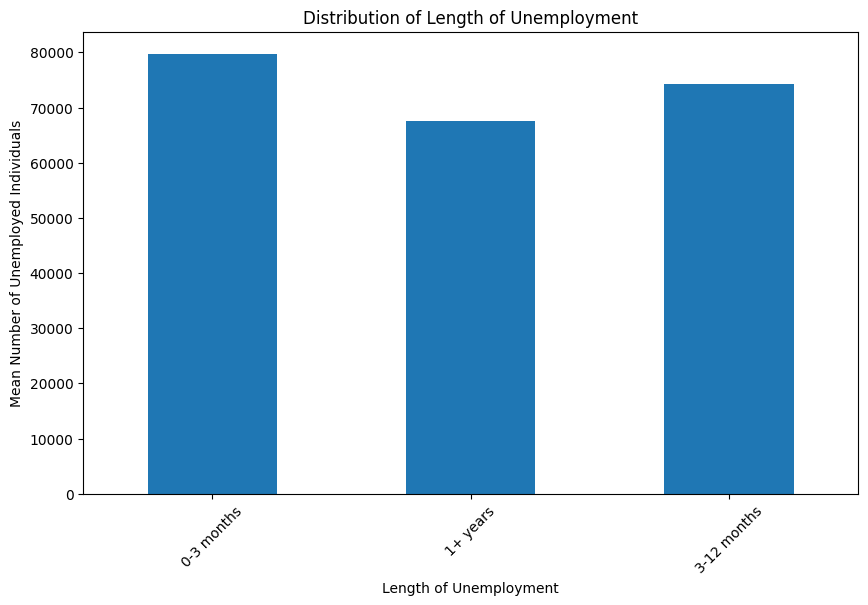

In [ ]:

# Filter data for % of individuals unemployed
unemployment_data = data4[data4['measure'] == '% of individuals unemployed']

# Group by length_of_unemployment and calculate the mean numerator
length_of_unemployment_dist = unemployment_data.groupby('length_of_unemployment')['numerator'].mean()

# Plot the distribution of the length of unemployment
plt.figure(figsize=(10, 6))
length_of_unemployment_dist.plot(kind='bar')
plt.title('Distribution of Length of Unemployment')
plt.xlabel('Length of Unemployment')
plt.ylabel('Mean Number of Unemployed Individuals')
plt.xticks(rotation=45)
plt.show()


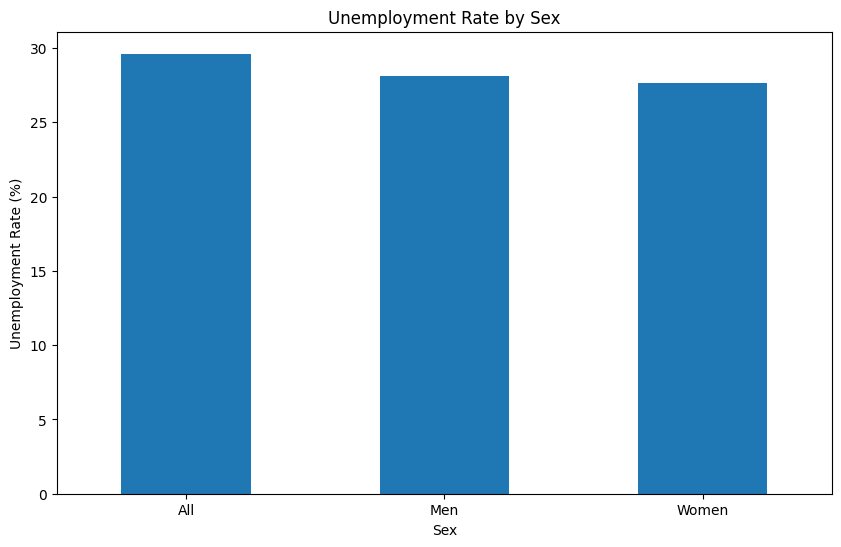

In [ ]:
# Group by sex and calculate the mean numerator and denominator to get the unemployment rate
unemployment_by_sex = unemployment_data.groupby('sex').apply(
    lambda x: (x['numerator'].sum() / x['denominator'].sum()) * 100
)

# Plot the unemployment rate by sex
plt.figure(figsize=(10, 6))
unemployment_by_sex.plot(kind='bar')
plt.title('Unemployment Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=0)
plt.show()


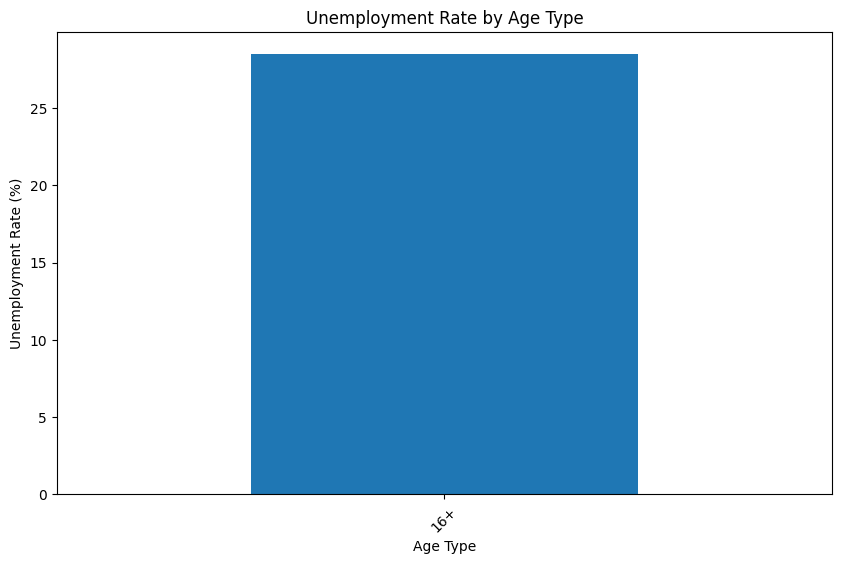

In [ ]:
# Group by age_type and calculate the mean numerator and denominator to get the unemployment rate
unemployment_by_age = unemployment_data.groupby('age_type').apply(
    lambda x: (x['numerator'].sum() / x['denominator'].sum()) * 100
)

# Plot the unemployment rate by age type
plt.figure(figsize=(10, 6))
unemployment_by_age.plot(kind='bar')
plt.title('Unemployment Rate by Age Type')
plt.xlabel('Age Type')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


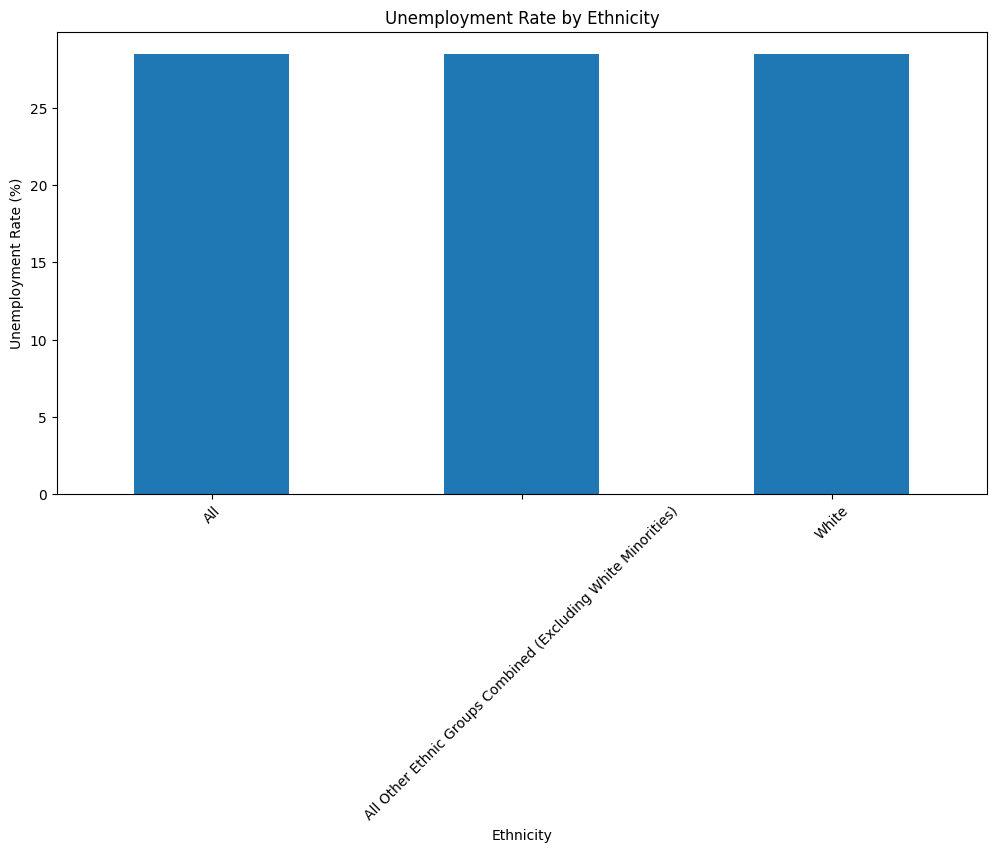

In [ ]:
# Group by ethnicity and calculate the mean numerator and denominator to get the unemployment rate
unemployment_by_ethnicity = unemployment_data.groupby('ethnicity').apply(
    lambda x: (x['numerator'].sum() / x['denominator'].sum()) * 100
)

# Plot the unemployment rate by ethnicity
plt.figure(figsize=(12, 6))
unemployment_by_ethnicity.plot(kind='bar')
plt.title('Unemployment Rate by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


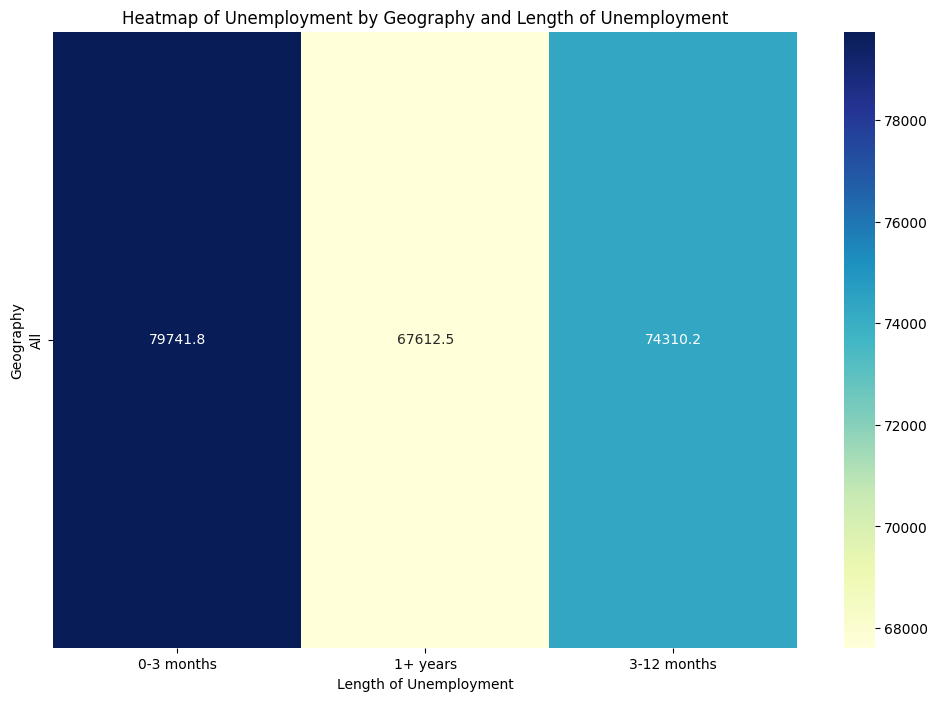

In [ ]:
# Prepare data for heatmap
heatmap_data = unemployment_data.pivot_table(
    index='geography', columns='length_of_unemployment', values='numerator', aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Unemployment by Geography and Length of Unemployment')
plt.xlabel('Length of Unemployment')
plt.ylabel('Geography')
plt.show()


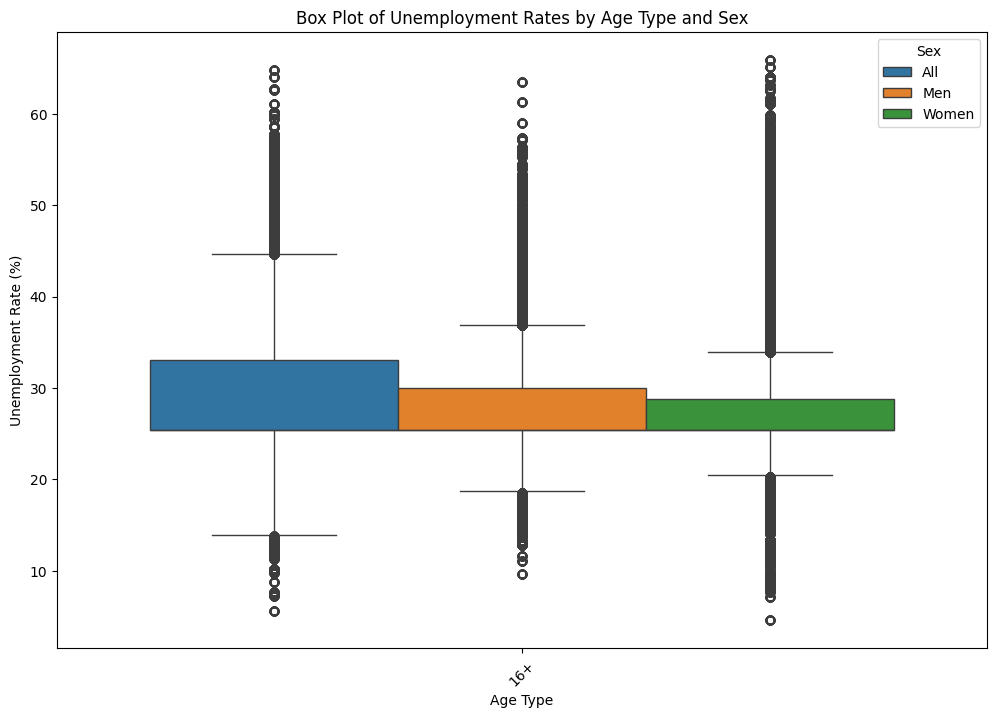

In [ ]:
# Prepare data for box plot
boxplot_data = unemployment_data.copy()
boxplot_data['unemployment_rate'] = (boxplot_data['numerator'] / boxplot_data['denominator']) * 100

# Plot box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=boxplot_data, x='age_type', y='unemployment_rate', hue='sex')
plt.title('Box Plot of Unemployment Rates by Age Type and Sex')
plt.xlabel('Age Type')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()


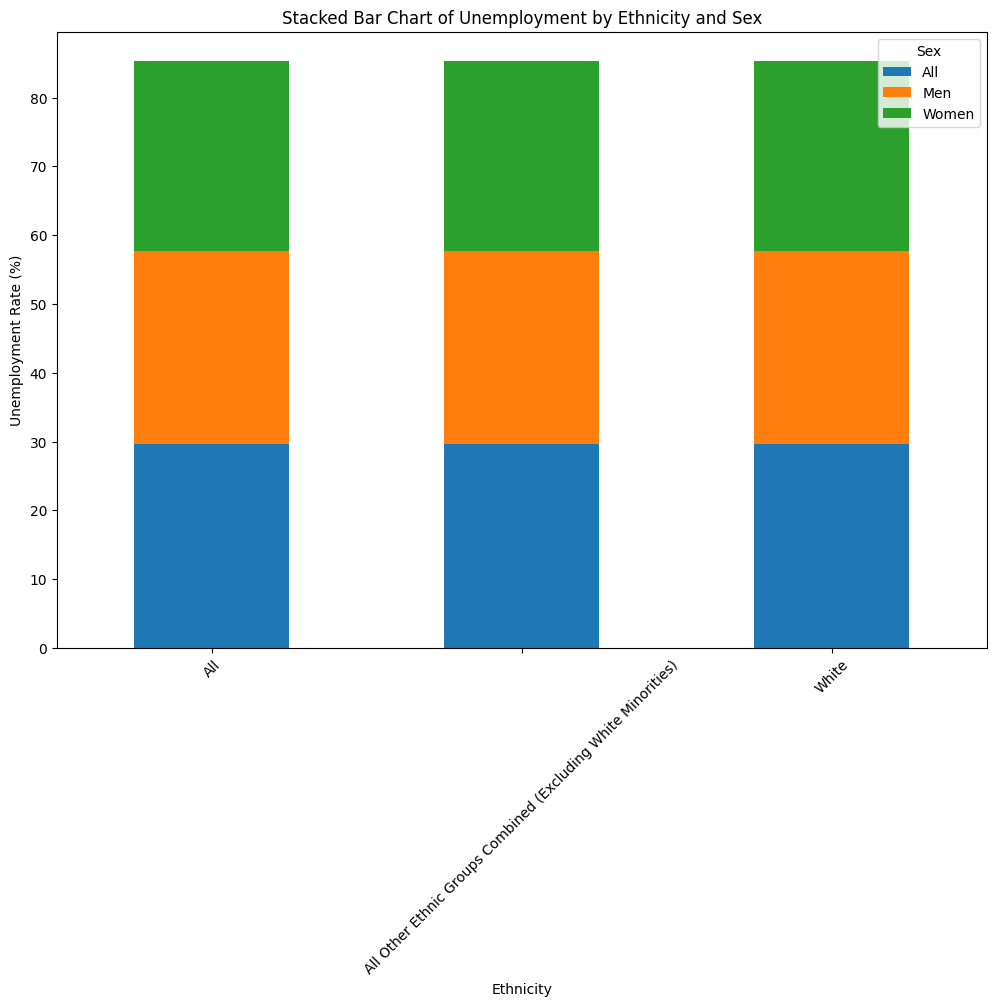

In [ ]:
# Prepare data for stacked bar chart
stacked_bar_data = unemployment_data.groupby(['ethnicity', 'sex']).apply(
    lambda x: (x['numerator'].sum() / x['denominator'].sum()) * 100
).unstack()

# Plot stacked bar chart
stacked_bar_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart of Unemployment by Ethnicity and Sex')
plt.xlabel('Ethnicity')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()


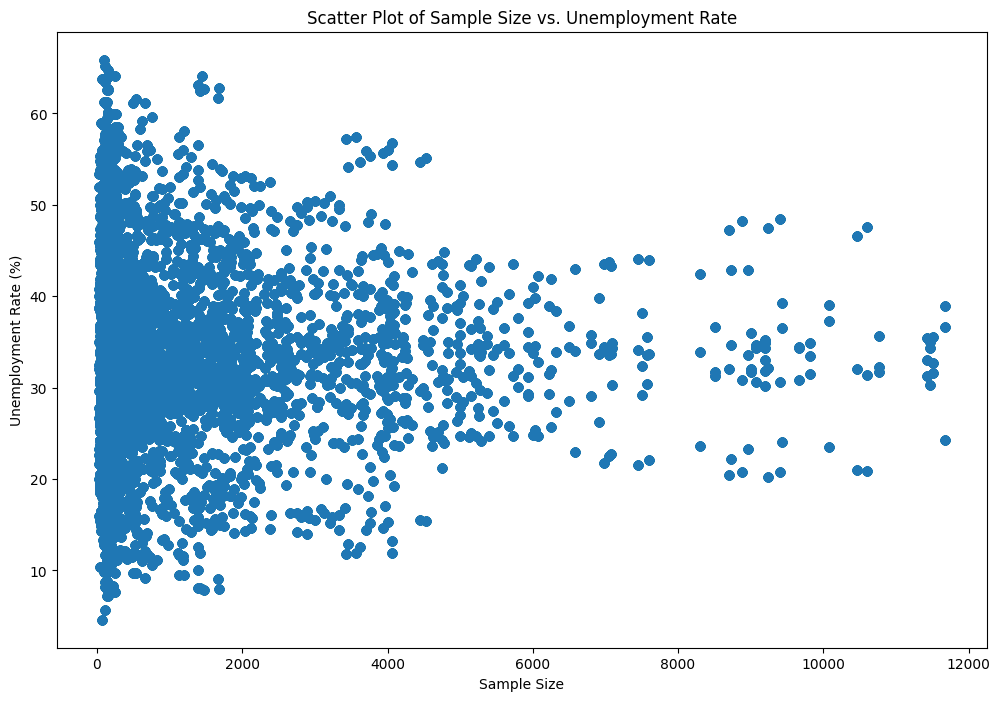

In [ ]:
# Prepare data for scatter plot
scatter_data = unemployment_data.copy()
scatter_data['unemployment_rate'] = (scatter_data['numerator'] / scatter_data['denominator']) * 100

# Plot scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(scatter_data['sample_size'], scatter_data['unemployment_rate'], alpha=0.6)
plt.title('Scatter Plot of Sample Size vs. Unemployment Rate')
plt.xlabel('Sample Size')
plt.ylabel('Unemployment Rate (%)')
plt.show()


# Building Models for Classification of Length of unemployement


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Droping columns that are  not needed for the models
data4 = data4.drop(columns=['geography', 'geography_type', 'measure'])

# Encoding categorical variables
label_encoders = {}
for column in ['length_of_unemployment', 'age_type', 'sex', 'ethnicity_type', 'ethnicity']:
    le = LabelEncoder()
    data4[column] = le.fit_transform(data4[column])
    label_encoders[column] = le

# Filling the  missing values
data4 = data4.fillna(0)

# Defining features and target variable
X = data4.drop(columns=['length_of_unemployment'])
y = data4['length_of_unemployment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((494724, 8), (123682, 8), (494724,), (123682,))

Logistic Regression Model

Logistic Regression Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.33      0.37     42160
           1       0.40      0.83      0.54     42232
           2       0.57      0.04      0.07     39290

    accuracy                           0.41    123682
   macro avg       0.46      0.40      0.33    123682
weighted avg       0.46      0.41      0.33    123682

Accuracy: 0.40727834284697856


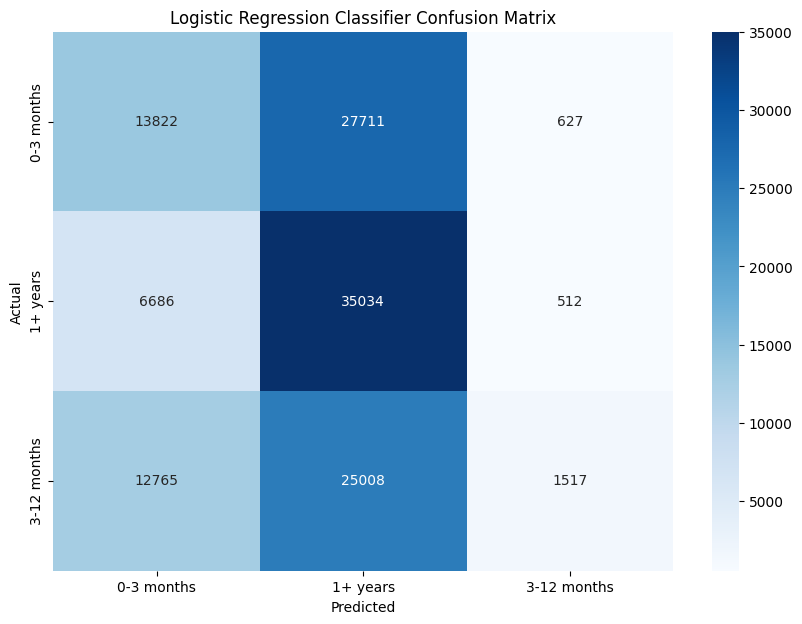

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_test, y_pred_log_reg, title):
    cm = confusion_matrix(y_test, y_pred_log_reg)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['length_of_unemployment'].classes_, yticklabels=label_encoders['length_of_unemployment'].classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Function to print classification report
def print_classification_report(y_test, y_pred_log_reg, title):
    print(f"{title} Classification Report:")
    print(classification_report(y_test, y_pred_log_reg))
    print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

print_classification_report(y_test, y_pred_log_reg, "Logistic Regression Classifier")
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression Classifier Confusion Matrix")



Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.66      0.61     42160
           1       0.61      0.61      0.61     42232
           2       0.68      0.56      0.62     39290

    accuracy                           0.61    123682
   macro avg       0.62      0.61      0.61    123682
weighted avg       0.62      0.61      0.61    123682

Accuracy: 0.6118351902459533


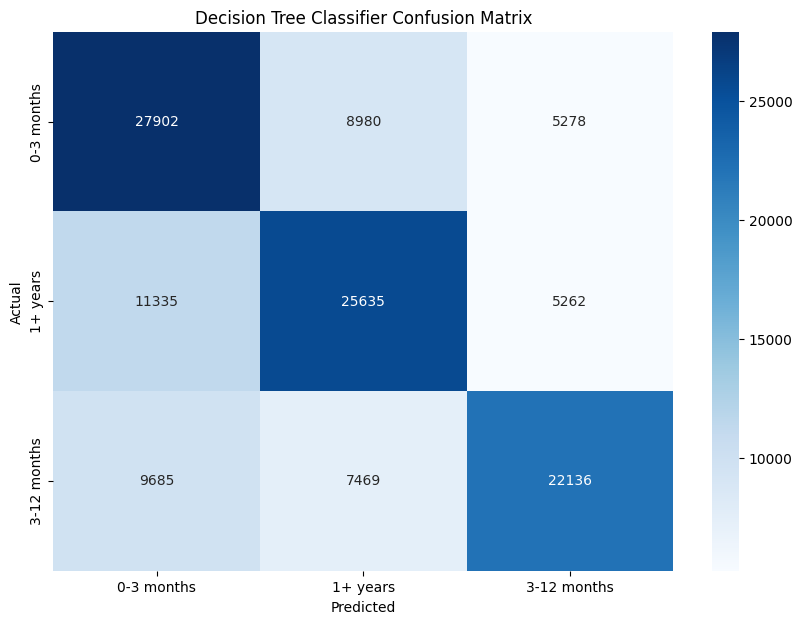

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initializing and training the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Making predictions on the test set
y_pred_decision_tree = decision_tree.predict(X_test)


# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['length_of_unemployment'].classes_, yticklabels=label_encoders['length_of_unemployment'].classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

  # Function to print classification report
def print_classification_report(y_test, y_pred, title):
    print(f"{title} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

 # Evaluating the model
print_classification_report(y_test, y_pred_decision_tree, "Decision Tree Classifier")
plot_confusion_matrix(y_test, y_pred_decision_tree, "Decision Tree Classifier Confusion Matrix")



Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.66      0.61     42160
           1       0.61      0.60      0.61     42232
           2       0.67      0.57      0.62     39290

    accuracy                           0.61    123682
   macro avg       0.62      0.61      0.61    123682
weighted avg       0.62      0.61      0.61    123682

Accuracy: 0.61187561650038


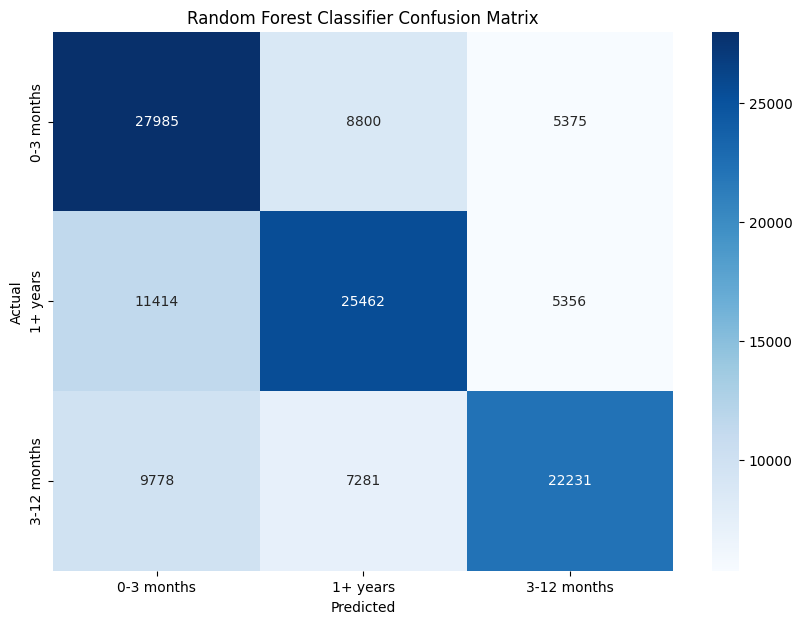

In [ ]:
# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate the model
print_classification_report(y_test, y_pred_random_forest, "Random Forest Classifier")
plot_confusion_matrix(y_test, y_pred_random_forest, "Random Forest Classifier Confusion Matrix")

# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['length_of_unemployment'].classes_, yticklabels=label_encoders['length_of_unemployment'].classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Function to print classification report
def print_classification_report(y_test, y_pred, title):
    print(f"{title} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:

# Check the column names
print("Column names:", data4.columns)

Column names: Index(['length_of_unemployment', 'age_type', 'sex', 'confidence_interval',
       'numerator', 'denominator', 'sample_size', 'ethnicity_type',
       'ethnicity'],
      dtype='object')


Gaussian Naive Bayes Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.10      0.16     42160
           1       0.35      0.94      0.51     42232
           2       0.23      0.01      0.02     39290

    accuracy                           0.35    123682
   macro avg       0.34      0.35      0.23    123682
weighted avg       0.34      0.35      0.23    123682

Accuracy: 0.35461910383079187


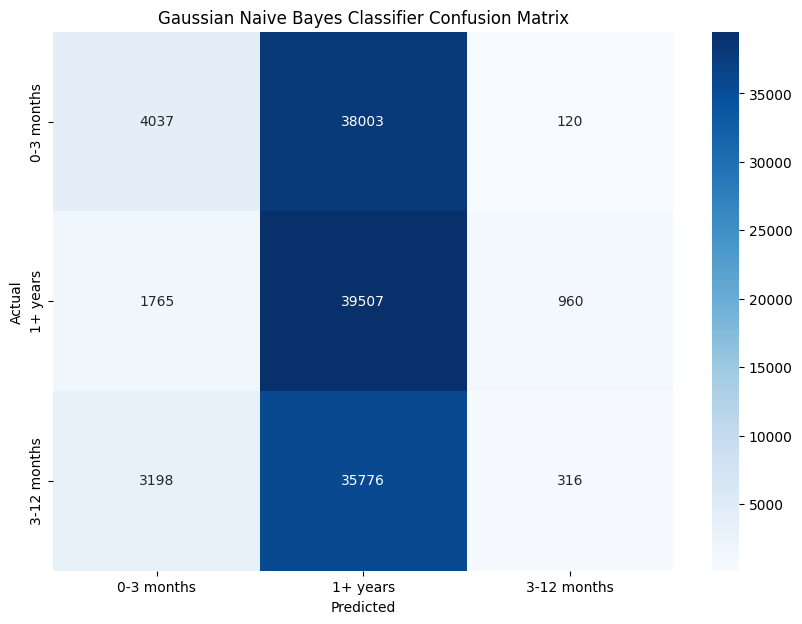

In [ ]:

# Initialize and train the Gaussian Naive Bayes model
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gaussian_nb = gaussian_nb.predict(X_test)




# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['length_of_unemployment'].classes_, yticklabels=label_encoders['length_of_unemployment'].classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Function to print classification report
def print_classification_report(y_test, y_pred, title):
    print(f"{title} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Evaluate the model
print_classification_report(y_test, y_pred_gaussian_nb, "Gaussian Naive Bayes Classifier")
plot_confusion_matrix(y_test, y_pred_gaussian_nb, "Gaussian Naive Bayes Classifier Confusion Matrix")



KNN Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.71      0.62     42160
           1       0.62      0.59      0.61     42232
           2       0.72      0.53      0.61     39290

    accuracy                           0.61    123682
   macro avg       0.63      0.61      0.61    123682
weighted avg       0.63      0.61      0.61    123682

Accuracy: 0.6133147911579696


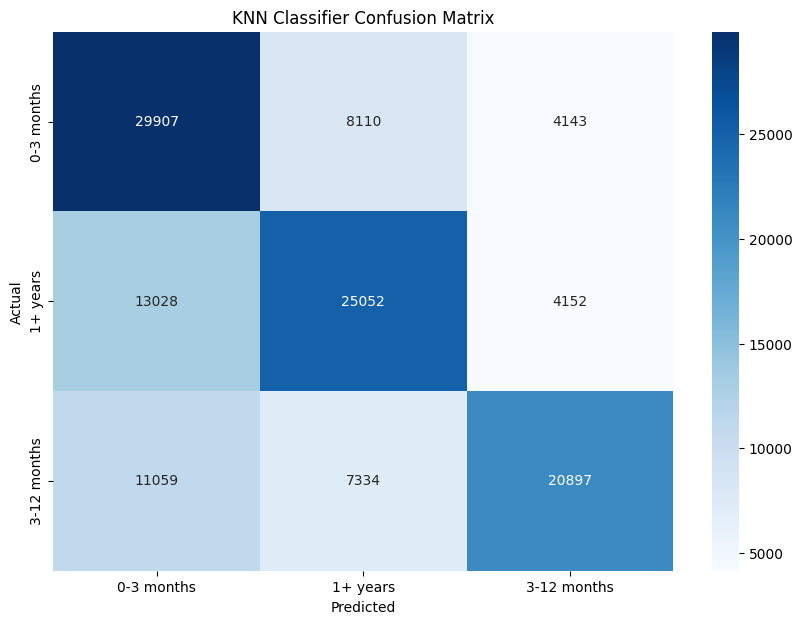

In [ ]:
# Initialize and train the KNN model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['length_of_unemployment'].classes_, yticklabels=label_encoders['length_of_unemployment'].classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Function to print classification report
def print_classification_report(y_test, y_pred, title):
    print(f"{title} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

# Evaluate the model
print_classification_report(y_test, y_pred_knn, "KNN Classifier")
plot_confusion_matrix(y_test, y_pred_knn, "KNN Classifier Confusion Matrix")


# Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Check for missing values
missing_values = data4.isnull().sum()

# Display missing values
missing_values

,0
length_of_unemployment,0
age_type,0
sex,0
confidence_interval,0
numerator,0
denominator,0
sample_size,0
ethnicity_type,0
ethnicity,0


In [ ]:




# Print the column names and data types of the DataFrame
print("Column Names:\n", data4.columns)
print("\nData Types:\n", data4.dtypes)



Column Names:
 Index(['length_of_unemployment', 'age_type', 'sex', 'confidence_interval',
       'numerator', 'denominator', 'sample_size', 'ethnicity_type',
       'ethnicity'],
      dtype='object')

Data Types:
 length_of_unemployment      int64
age_type                    int64
sex                         int64
confidence_interval       float64
numerator                 float64
denominator               float64
sample_size               float64
ethnicity_type              int64
ethnicity                   int64
dtype: object


In [ ]:
# Define the categorical and numerical columns (adjusted to match the actual columns)
categorical_cols = ['length_of_unemployment', 'age_type', 'sex', 'ethnicity_type', 'ethnicity']
numerical_cols = ['confidence_interval', 'numerator', 'denominator', 'sample_size']

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply the preprocessing pipeline to the data
preprocessed_data = preprocessor.fit_transform(data4)

# Convert the preprocessed data to a DataFrame for better readability
encoded_cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_columns = np.append(numerical_cols, encoded_cat_columns)
preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_columns)

# Display the first few rows of the preprocessed data
print(preprocessed_df.head())

   confidence_interval  numerator  denominator  sample_size  \
0            -1.707981   3.161214     1.338002     2.572418   
1            -1.707981   3.161214     1.338002     2.572418   
2            -1.707981   3.161214     1.338002     2.572418   
3            -1.707981   3.161214     1.338002     2.572418   
4            -1.707981   3.161214     1.338002     2.572418   

   length_of_unemployment_0  length_of_unemployment_1  \
0                       1.0                       0.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       0.0   
4                       1.0                       0.0   

   length_of_unemployment_2  age_type_0  sex_0  sex_1  sex_2  \
0                       0.0         1.0    1.0    0.0    0.0   
1                       0.0         1.0    1.0    0.0    0.0   
2                       0.0         1.0    1.0    0.0    0.0   
3                     

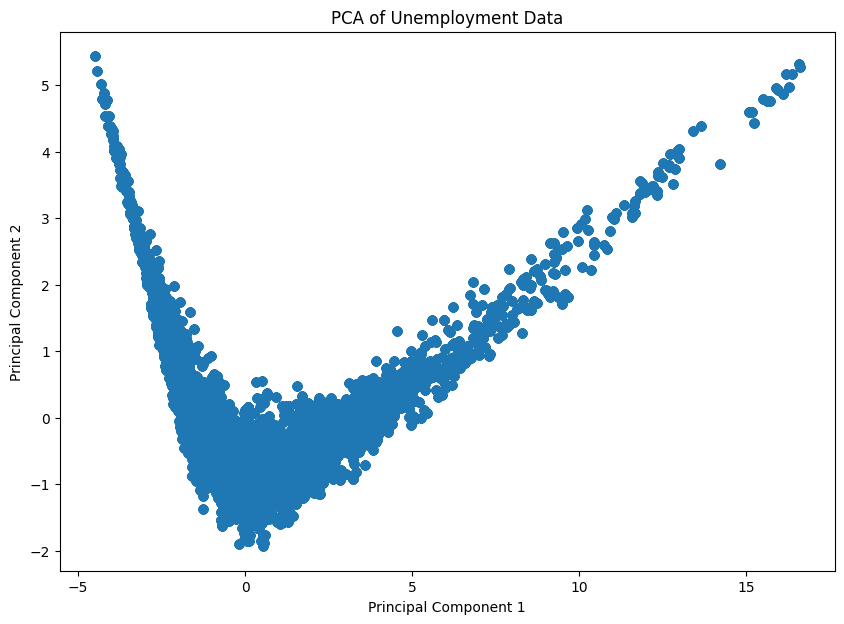

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(preprocessed_df)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Unemployment Data')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

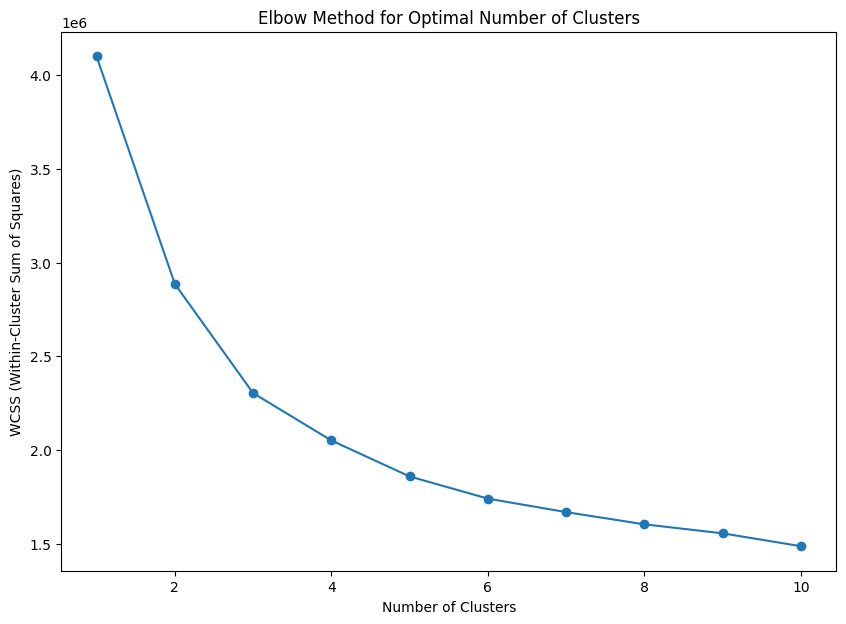

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(preprocessed_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method results
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


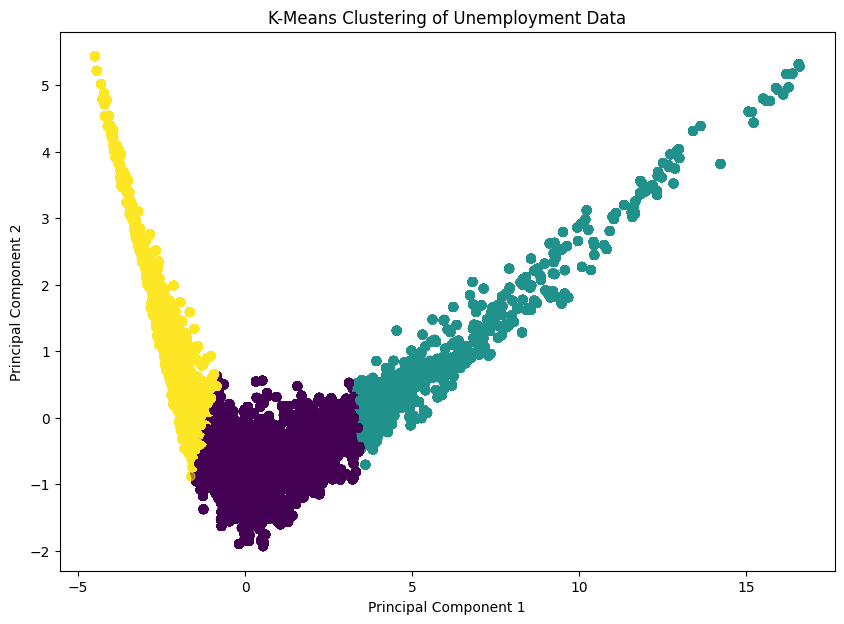

In [ ]:
# Apply K-Means clustering with the chosen number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(preprocessed_df)

# Add the cluster labels to the PCA DataFrame for visualization
pca_df['Cluster'] = kmeans_labels

# Plot the K-Means clustering results
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Unemployment Data')
plt.show()


# Detecting Anamolies

In [ ]:
data4 = pd.read_csv('/content/Cleaned_data (1).csv')

In [ ]:
# Display the first few rows of data4
data4.head()

,length_of_unemployment,geography,geography_type,age_type,sex,confidence_interval,numerator,denominator,sample_size,ethnicity_type,ethnicity,measure
0,0-3 months,All,Great Britain,16+,All,1.5,314300.0,553800.0,4057.0,All,All,% of individuals unemployed
1,0-3 months,All,Great Britain,16+,All,1.5,314300.0,553800.0,4057.0,All,All,% of individuals unemployed
2,0-3 months,All,Great Britain,16+,All,1.5,314300.0,553800.0,4057.0,All,All,% of individuals unemployed
3,0-3 months,All,Great Britain,16+,All,1.5,314300.0,553800.0,4057.0,All,All,% of individuals unemployed
4,0-3 months,All,Great Britain,16+,All,1.5,314300.0,553800.0,4057.0,All,All,% of individuals unemployed


In [ ]:
data4['unemployment_rate'] = data4['numerator'] / data4['denominator']


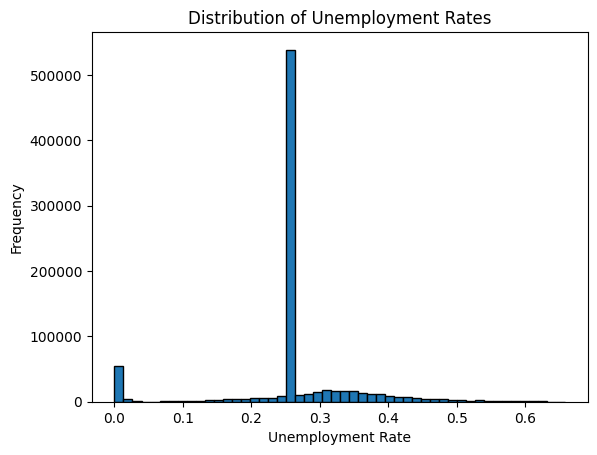

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data4['unemployment_rate'].dropna(), bins=50, edgecolor='k')
plt.title('Distribution of Unemployment Rates')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()


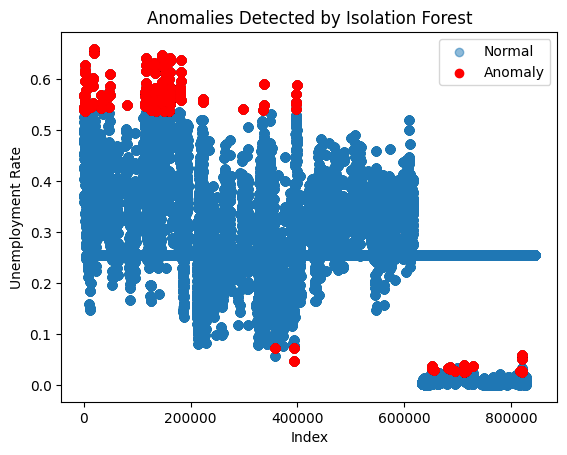

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01)
data4['anomaly_iso'] = iso.fit_predict(data4[['unemployment_rate']])

# Visualize anomalies
anomalies_iso = data4[data4['anomaly_iso'] == -1]
plt.scatter(data4.index, data4['unemployment_rate'], label='Normal', alpha=0.5)
plt.scatter(anomalies_iso.index, anomalies_iso['unemployment_rate'], color='r', label='Anomaly')
plt.title('Anomalies Detected by Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()


In [ ]:
# Display column names and statistical summary of the dataset
data4.columns, data4.describe()


(Index(['length_of_unemployment', 'geography', 'geography_type', 'age_type',
        'sex', 'confidence_interval', 'numerator', 'denominator', 'sample_size',
        'ethnicity_type', 'ethnicity', 'measure', 'unemployment_rate',
        'anomaly_iso'],
       dtype='object'),
        confidence_interval      numerator   denominator    sample_size  \
 count        844740.000000  844740.000000  8.447400e+05  844740.000000   
 mean              6.306480   67543.619910  2.658548e+05    1228.605430   
 std               3.048829   67610.632017  2.142865e+05    1083.873258   
 min               0.100000       0.000000  3.000000e+03      30.000000   
 25%               6.306480   52075.000000  2.513000e+05    1114.000000   
 50%               6.306480   67543.619910  2.658548e+05    1228.605430   
 75%               6.306480   67543.619910  2.658548e+05    1228.605430   
 max              28.200000  912200.000000  2.476600e+06   11671.000000   
 
        unemployment_rate    anomaly_iso  
 co

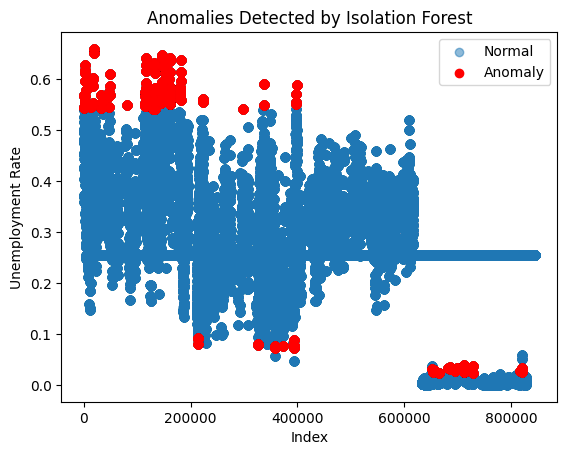

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01)
data4['anomaly_iso'] = iso.fit_predict(data4[['unemployment_rate']])

# Visualize anomalies
anomalies_iso = data4[data4['anomaly_iso'] == -1]
plt.scatter(data4.index, data4['unemployment_rate'], label='Normal', alpha=0.5)
plt.scatter(anomalies_iso.index, anomalies_iso['unemployment_rate'], color='r', label='Anomaly')
plt.title('Anomalies Detected by Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()


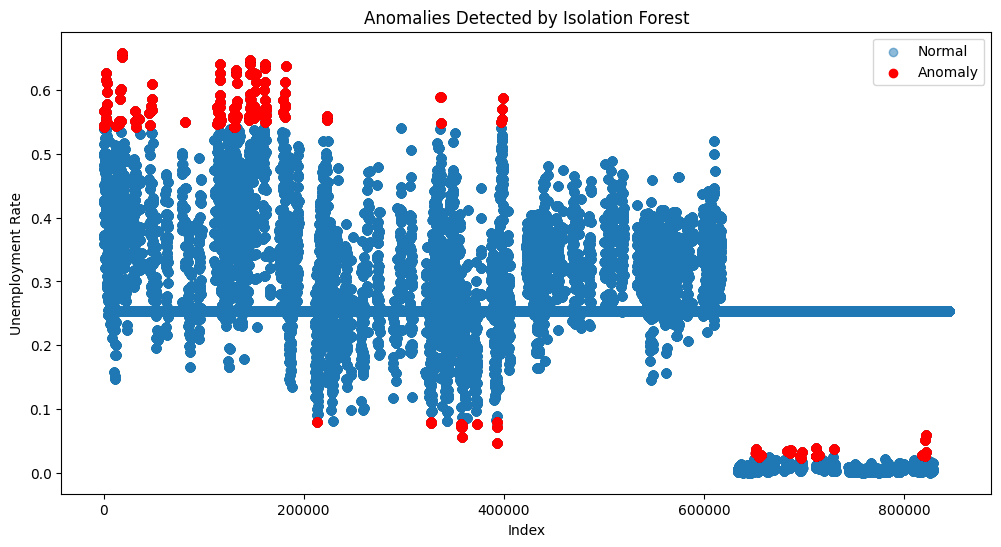

In [ ]:
from sklearn.ensemble import IsolationForest

# Step 3: Apply Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
data4['anomaly_iso'] = iso.fit_predict(data4[['unemployment_rate']])

# Visualize anomalies
anomalies_iso = data4[data4['anomaly_iso'] == -1]
plt.figure(figsize=(12, 6))
plt.scatter(data4.index, data4['unemployment_rate'], label='Normal', alpha=0.5)
plt.scatter(anomalies_iso.index, anomalies_iso['unemployment_rate'], color='r', label='Anomaly')
plt.title('Anomalies Detected by Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()


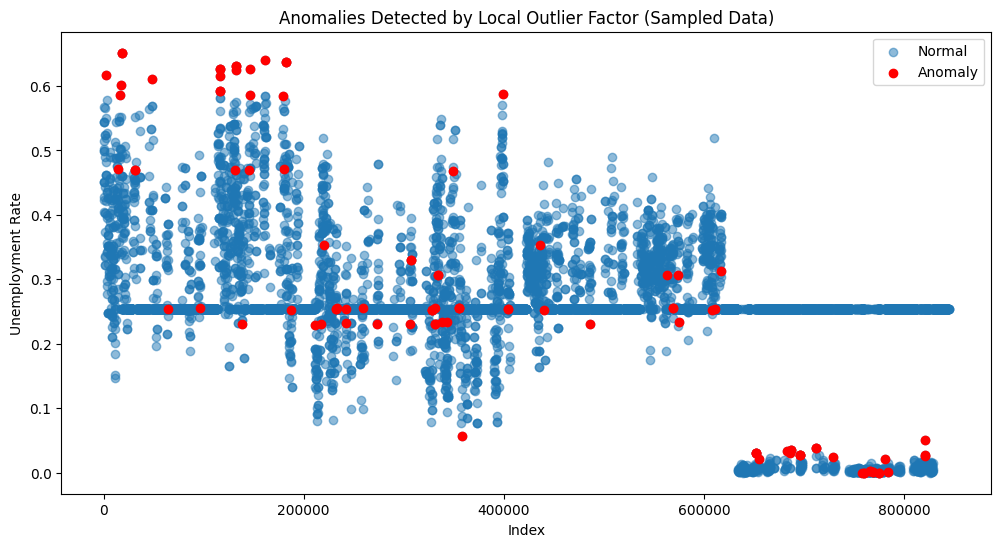

In [ ]:

import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# 1: Randomly sampling a subset of the data
data4_sample = data4.sample(n=10000, random_state=42)

#2: Applying Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
data4_sample['anomaly_lof'] = lof.fit_predict(data4_sample[['unemployment_rate']])

#3: Visualizing anomalies
anomalies_lof = data4_sample[data4_sample['anomaly_lof'] == -1]
plt.figure(figsize=(12, 6))
plt.scatter(data4_sample.index, data4_sample['unemployment_rate'], label='Normal', alpha=0.5)
plt.scatter(anomalies_lof.index, anomalies_lof['unemployment_rate'], color='r', label='Anomaly')
plt.title('Anomalies Detected by Local Outlier Factor (Sampled Data)')
plt.xlabel('Index')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()



In [ ]:
pip install tensorflow


In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler

# Preprocessing: Normalize the data
scaler = StandardScaler()
data4_sample_normalized = scaler.fit_transform(data4_sample[['unemployment_rate']])

# Define the Autoencoder
input_dim = data4_sample_normalized.shape[1]
encoding_dim = 2
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the Autoencoder
autoencoder.fit(data4_sample_normalized, data4_sample_normalized,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_split=0.1)


Epoch 1/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.8588 - val_loss: 0.8260
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7690 - val_loss: 0.7599
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7449 - val_loss: 0.7294
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6733 - val_loss: 0.7151
Epoch 5/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6508 - val_loss: 0.7076
Epoch 6/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.7034 - val_loss: 0.7034
Epoch 7/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.7001 - val_loss: 0.7008
Epoch 8/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6390 - val_loss: 0.6991
Epoch 9/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6699 - val_loss: 0.6980
Epoch 10/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6579 - val_loss: 0.6973
Epoch 11/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6645 - val_loss: 0.6968
Epoch 12/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/ste

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


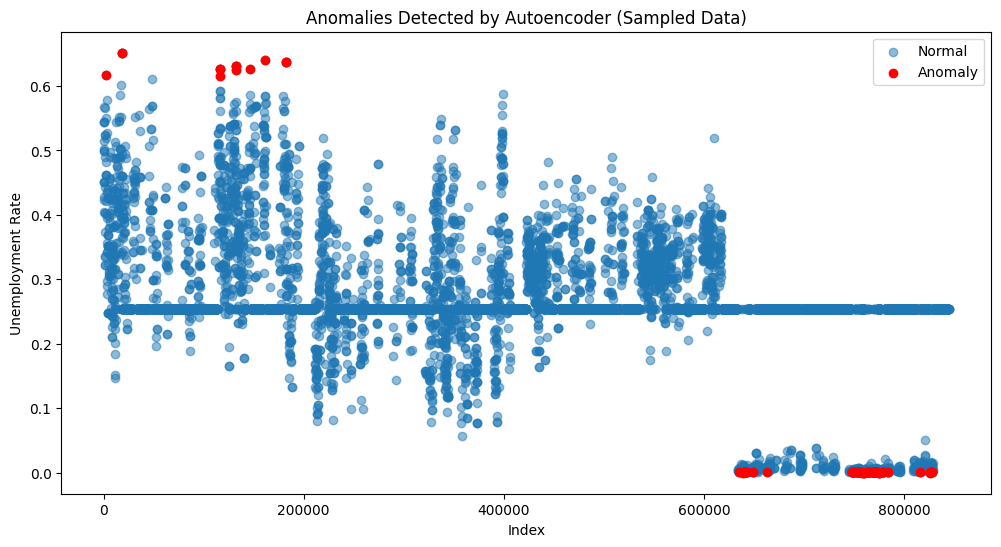

In [ ]:

reconstructed_data = autoencoder.predict(data4_sample_normalized)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.power(data4_sample_normalized - reconstructed_data, 2), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 99)

# Identify anomalies
data4_sample['anomaly_autoencoder'] = reconstruction_error > threshold

# Visualize anomalies
anomalies_autoencoder = data4_sample[data4_sample['anomaly_autoencoder'] == True]
plt.figure(figsize=(12, 6))
plt.scatter(data4_sample.index, data4_sample['unemployment_rate'], label='Normal', alpha=0.5)
plt.scatter(anomalies_autoencoder.index, anomalies_autoencoder['unemployment_rate'], color='r', label='Anomaly')
plt.title('Anomalies Detected by Autoencoder (Sampled Data)')
plt.xlabel('Index')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()


#	Forecasting Demographic-Specific Unemployment Trends:

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/unemployement/modified_data3.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()



,ethnicity,ethnicity_type,time,time_type,geography,geography_type,age,age_type,sex,value,confidence_interval,numerator,denominator,sample_size
0,All,All,Jan2004-Dec2004,year,All,Great Britain,16-24,16+,All,12.3,0.3,553800,4488200,49218
1,All,All,Jan2005-Dec2005,year,All,Great Britain,16-24,16+,All,13,0.3,591300,4536300,46261
2,All,All,Jan2006-Dec2006,year,All,Great Britain,16-24,16+,All,13.9,0.4,637900,4575700,33854
3,All,All,Jan2007-Dec2007,year,All,Great Britain,16-24,16+,All,13.8,0.4,638900,4613200,33686
4,All,All,Jan2008-Dec2008,year,All,Great Britain,16-24,16+,All,15.1,0.4,700200,4629400,32709


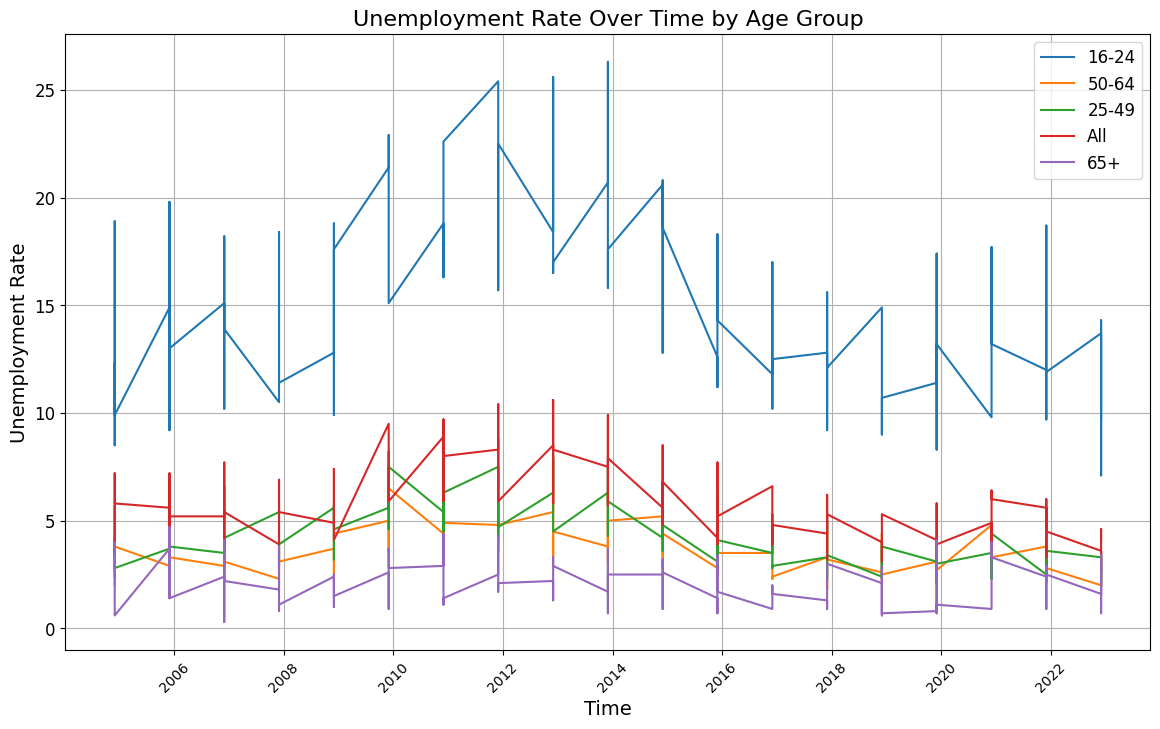

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'time' to a datetime format and ensure it's sorted
data['time'] = pd.to_datetime(data['time'].apply(lambda x: x.split('-')[1]), format='%b%Y')
data = data.sort_values('time')

# Ensure 'value' is numeric and handle NaNs
data['value'] = pd.to_numeric(data['value'], errors='coerce')
data['value'] = data['value'].interpolate(method='linear')

# Get unique age groups
age_groups = data['age'].unique()

# Plotting the unemployment rate over time for different age groups with improved readability
plt.figure(figsize=(14, 8))
for age_group in age_groups:
    age_data = data[(data['age'] == age_group) & (data['ethnicity'] == 'All') & (data['sex'] == 'All')]
    plt.plot(age_data['time'], age_data['value'], label=age_group)

plt.title('Unemployment Rate Over Time by Age Group', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


datetime64[ns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

16-24 - Mean Squared Error: 7.2772076012383975


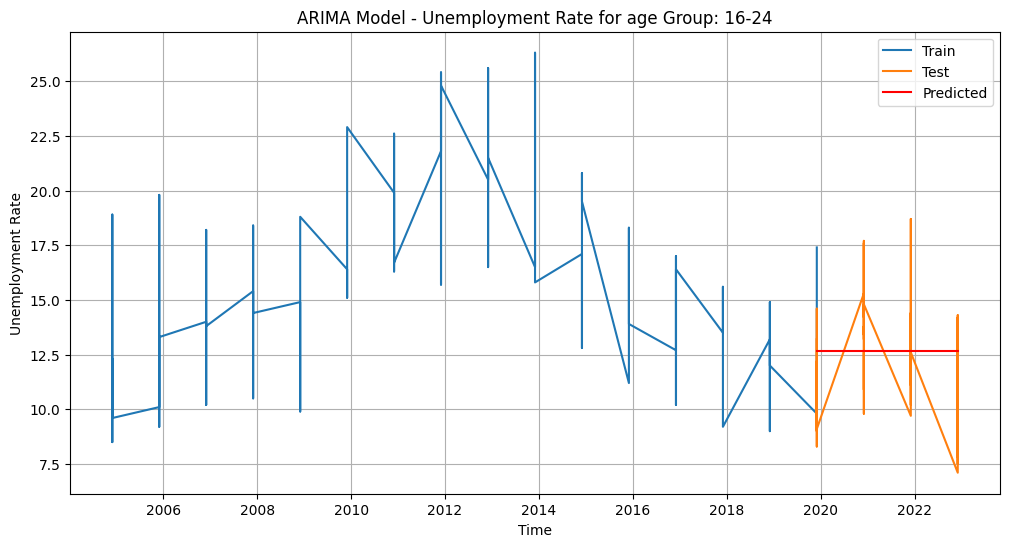

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

65+ - Mean Squared Error: 0.7540132400339523


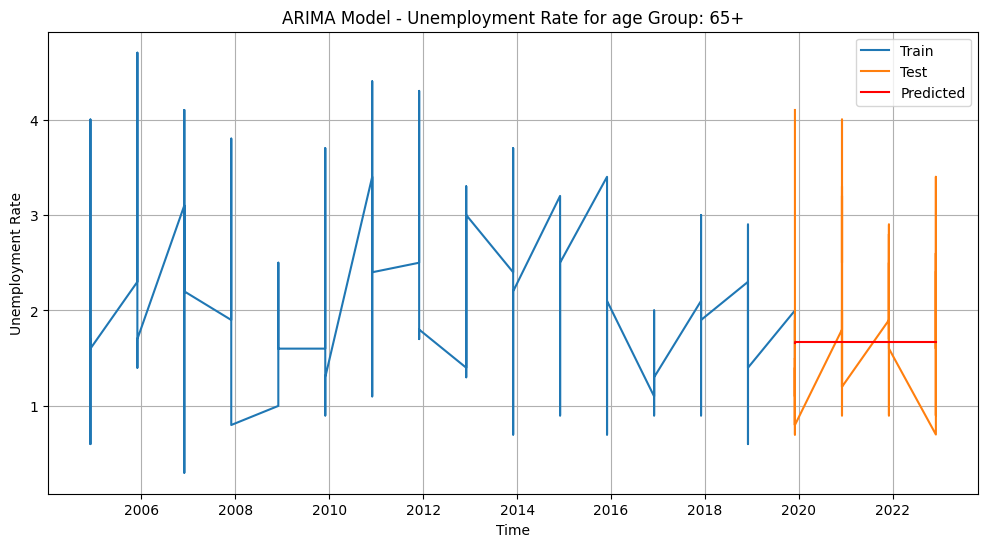

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

All - Mean Squared Error: 0.7791308489884995


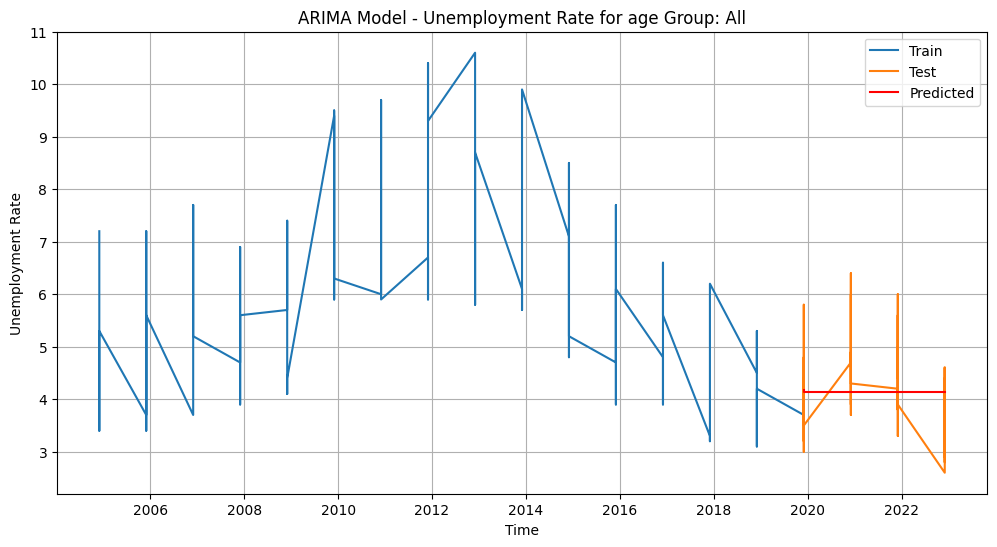

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

50-64 - Mean Squared Error: 0.5561241471067199


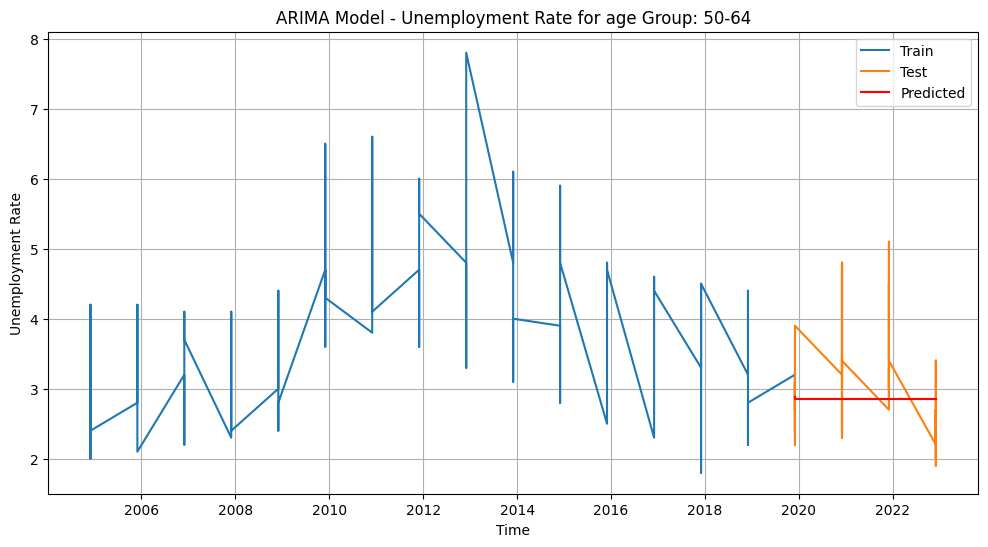

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

25-49 - Mean Squared Error: 0.5458166054136625


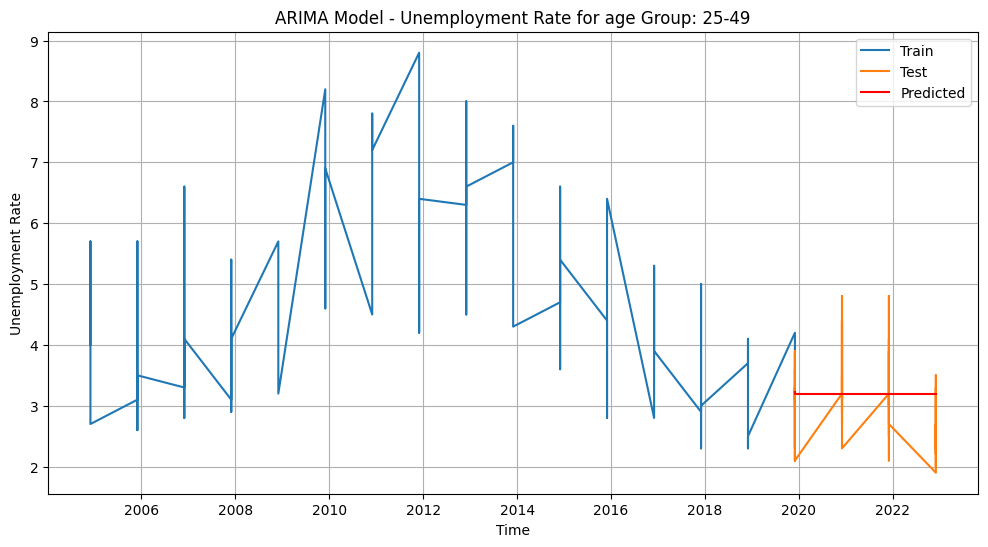

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



# Check the data type of the 'time' column
print(data['time'].dtype)

# If 'time' is not already datetime, convert it
if data['time'].dtype != 'datetime64[ns]':
    # Convert 'time' to a datetime format and ensure it's sorted
    data['time'] = pd.to_datetime(data['time'].apply(lambda x: x.split('-')[1]), format='%b%Y')

data = data.sort_values('time')

# Ensure 'value' is numeric and handle NaNs
data['value'] = pd.to_numeric(data['value'], errors='coerce')
data['value'] = data['value'].interpolate(method='linear')

# Function to prepare data for a specific demographic segment
def prepare_data(segment, segment_value):
    segment_data = data[(data[segment] == segment_value) & (data['ethnicity'] == 'All') & (data['sex'] == 'All')]
    segment_data = segment_data.set_index('time')
    segment_data = segment_data[['value']].astype(float)  # Ensure data is float
    return segment_data

# Function to forecast unemployment for a specific segment and plot the results
def forecast_unemployment(segment, segment_value):
    segment_data = prepare_data(segment, segment_value)

    # Split the data into train and test sets
    train_size = int(len(segment_data) * 0.8)
    train, test = segment_data.iloc[:train_size], segment_data.iloc[train_size:]

    # Fit the ARIMA model
    model = ARIMA(train, order=(1, 1, 1))
    model_fit = model.fit()

    # Making predictions
    start_index = len(train)
    end_index = len(train) + len(test) - 1
    predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')

    # Evaluate the model
    mse = mean_squared_error(test, predictions)
    print(f'{segment_value} - Mean Squared Error: {mse}')

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(test.index, predictions, label='Predicted', color='red')
    plt.title(f'ARIMA Model - Unemployment Rate for {segment} Group: {segment_value}')
    plt.xlabel('Time')
    plt.ylabel('Unemployment Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

# Get unique age groups
age_groups = data['age'].unique()

# Forecast for each age group
for age_group in age_groups:
    forecast_unemployment('age', age_group)

# Identifying The factors affecting Unemployement

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/unemployement/modified_data3.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,ethnicity,ethnicity_type,time,time_type,geography,geography_type,age,age_type,sex,value,confidence_interval,numerator,denominator,sample_size
0,All,All,Jan2004-Dec2004,year,All,Great Britain,16-24,16+,All,12.3,0.3,553800,4488200,49218
1,All,All,Jan2005-Dec2005,year,All,Great Britain,16-24,16+,All,13,0.3,591300,4536300,46261
2,All,All,Jan2006-Dec2006,year,All,Great Britain,16-24,16+,All,13.9,0.4,637900,4575700,33854
3,All,All,Jan2007-Dec2007,year,All,Great Britain,16-24,16+,All,13.8,0.4,638900,4613200,33686
4,All,All,Jan2008-Dec2008,year,All,Great Britain,16-24,16+,All,15.1,0.4,700200,4629400,32709


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Drop rows with missing values in essential columns
data_clean = data.dropna(subset=['value', 'ethnicity', 'time', 'geography', 'age', 'sex'])

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in ['ethnicity', 'ethnicity_type', 'time', 'time_type', 'geography', 'geography_type', 'age', 'age_type', 'sex']:
    le = LabelEncoder()
    data_clean[column] = le.fit_transform(data_clean[column])
    label_encoders[column] = le

# Convert 'value' to numeric
data_clean['value'] = pd.to_numeric(data_clean['value'], errors='coerce')

# Define features and target variable
X = data_clean[['ethnicity', 'ethnicity_type', 'time', 'time_type', 'geography', 'geography_type', 'age', 'age_type', 'sex']]
y = data_clean['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the cleaned and processed data
data_clean.head()


,ethnicity,ethnicity_type,time,time_type,geography,geography_type,age,age_type,sex,value,confidence_interval,numerator,denominator,sample_size
0,0,0,0,0,0,0,0,0,0,12.3,0.3,553800,4488200,49218
1,0,0,1,0,0,0,0,0,0,13.0,0.3,591300,4536300,46261
2,0,0,2,0,0,0,0,0,0,13.9,0.4,637900,4575700,33854
3,0,0,3,0,0,0,0,0,0,13.8,0.4,638900,4613200,33686
4,0,0,4,0,0,0,0,0,0,15.1,0.4,700200,4629400,32709


In [ ]:
# Check for missing values in the target variable
missing_values_count = y.isnull().sum()
total_values_count = len(y)
missing_percentage = (missing_values_count / total_values_count) * 100

missing_values_count, missing_percentage



(22842, 51.37651821862348)

In [ ]:
# Impute missing values in the target variable with the median
y_imputed = y.fillna(y.median())

# Verify that there are no more missing values in the target variable
y_imputed.isnull().sum()


0

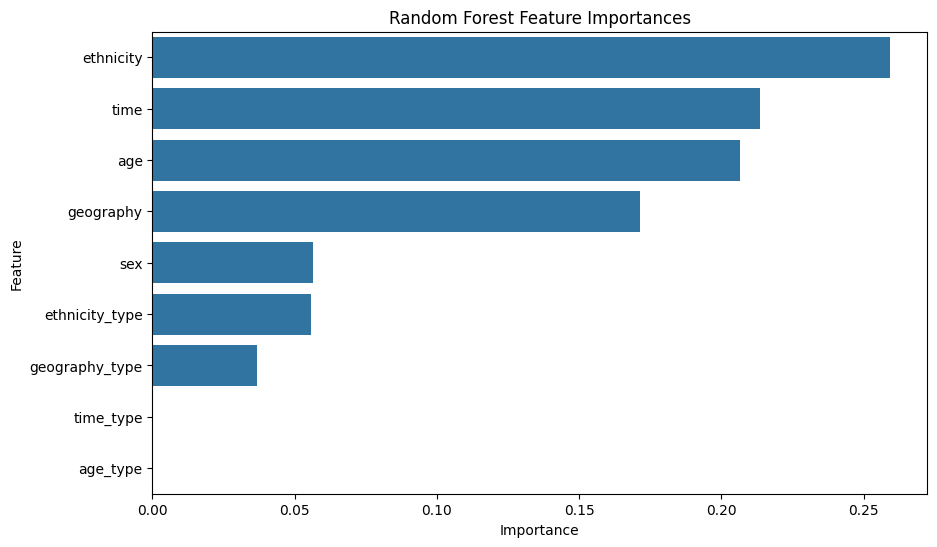

In [ ]:
# Redefine the features variable
features = X.columns

# Create a DataFrame for feature importances
importances_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})
importances_rf = importances_rf.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_rf)
plt.title('Random Forest Feature Importances')
plt.show()


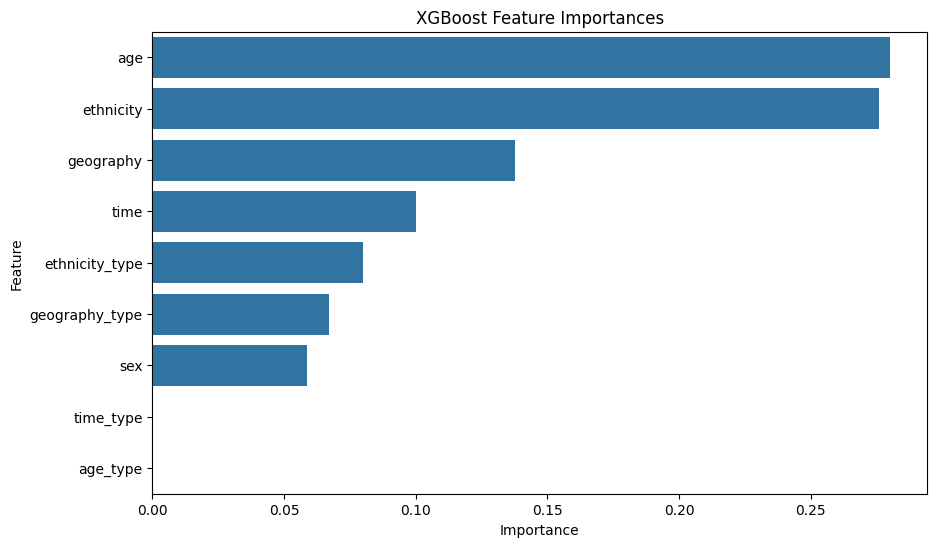

In [ ]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_imputed.loc[X_train.index])

# Get feature importances
feature_importances_xgb = xgb_model.feature_importances_

# Create a DataFrame for feature importances
importances_xgb = pd.DataFrame({'Feature': features, 'Importance': feature_importances_xgb})
importances_xgb = importances_xgb.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_xgb)
plt.title('XGBoost Feature Importances')
plt.show()


In [ ]:
!pip install shap


100%|===================| 35567/35568 [54:57<00:00]       

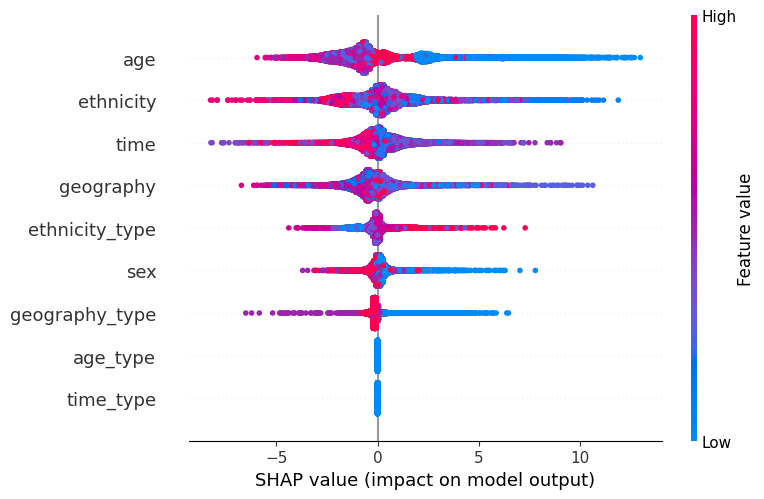

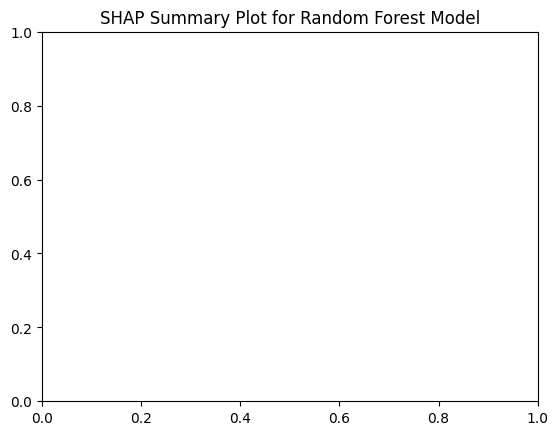

100%|===================| 35445/35568 [00:29<00:00]       

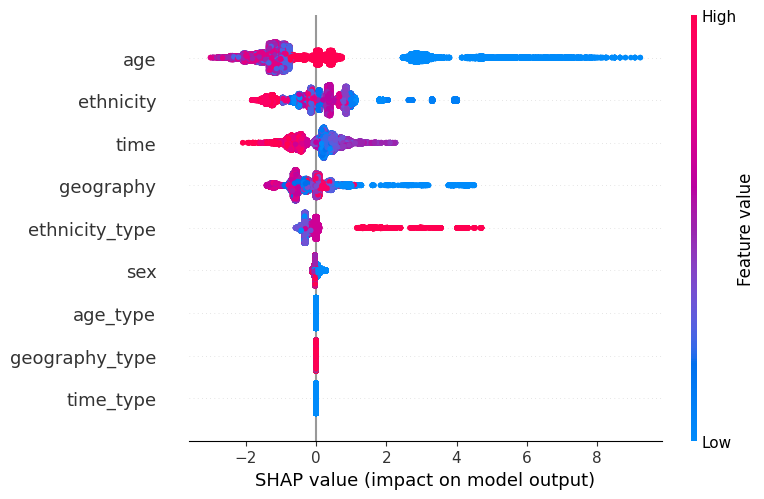

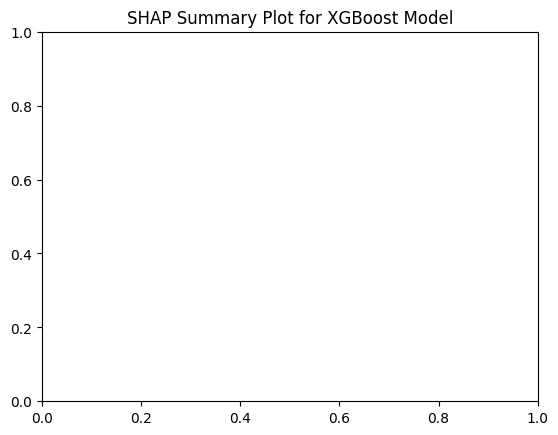

In [ ]:
import shap

# Initialize the SHAP explainer for the Random Forest model
explainer_rf = shap.Explainer(rf_model, X_train)
shap_values_rf = explainer_rf(X_train)

# Plot SHAP summary plot for the Random Forest model
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_rf, X_train)
plt.title('SHAP Summary Plot for Random Forest Model')
plt.show()

# Initialize the SHAP explainer for the XGBoost model
explainer_xgb = shap.Explainer(xgb_model, X_train)
shap_values_xgb = explainer_xgb(X_train)

# Plot SHAP summary plot for the XGBoost model
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_xgb, X_train)
plt.title('SHAP Summary Plot for XGBoost Model')
plt.show()
